In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

534.2977651069953


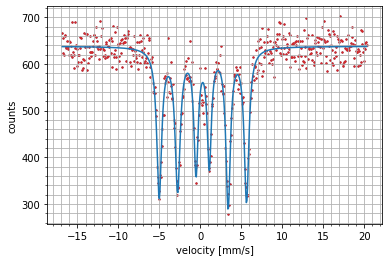

In [38]:
enriched = pd.read_csv("22421b enriched.csv")
enriched = enriched[["Channel", "Counts"]]
enriched = enriched.loc[(enriched["Channel"] < 512)]

def chan2vel(x):
    return (x - 231.59835488)/13.75331683

vel = chan2vel(np.array(enriched["Channel"]))

plt.scatter(vel, enriched["Counts"], s = 1)


def lorentz(x, a1, a2, a3, a4, a5, a6, h1, h2, h3, h4, h5, h6,\
            c1, c2, c3, c4, c5, c6, off):
    s = (a1*h1/((x - c1)**2 + h1**2)) + (a2*h2/((x - c2)**2 + h2**2)) +\
        (a3*h3/((x - c3)**2 + h3**2)) + (a4*h4/((x - c4)**2 + h4**2)) +\
            (a5*h5/((x - c5)**2 + h5**2)) + (a6*h6/((x - c6)**2 + h6**2))
    return 1/np.pi*s + off

lor1result = np.array([-6.51315301e+03,  7.07302646e-01, -8.08187929e+00, 1.23363165e+04])
lor2result = np.array([-4.83673622e+03,  3.20423691e-01, -2.86081216e+00, 1.18067384e+04])
lor3result = np.array([-3.22250980e+03,  3.53610398e-01, -4.06640818e-01, 1.15908488e+04])
lor4result = np.array([-2.38896637e+03,  2.09185555e-01,  1.02836230e+00, 1.13542540e+04])
lor5result = np.array([-6.04424261e+03,  3.82003453e-01,  3.30937532e+00, 1.21350835e+04])
lor6result = np.array([-6.67431841e+03,  4.13232713e-01,  5.56156965e+00, 1.23733385e+04])  
seed = np.array([])
off_seed = 660
amp_seed = np.array([lor1result[0], lor2result[0], lor3result[0], lor4result[0], lor5result[0], lor6result[0]])
seed = np.append(seed, amp_seed)
HWHM_seed = np.array([lor1result[1], lor2result[1], lor3result[1], lor4result[1], lor5result[1], lor6result[1]])
seed = np.append(seed, HWHM_seed)
C_seed = np.array([lor1result[2], lor2result[2], lor3result[2], lor4result[2], lor5result[2], lor6result[2]])
seed = np.append(seed, C_seed)
seed = np.append(seed, off_seed)
x = vel
y_obs = np.array(enriched["Counts"])

popt, pcov = optimize.curve_fit(lorentz, x, y_obs, p0 = seed)
y_fit = lorentz(x, *popt)

plt.plot(x, y_fit)
plt.scatter(x, y_obs, s = 2, color = 'tab:red')
plt.minorticks_on()
plt.grid(which='both')
plt.xlabel("velocity [mm/s]")
plt.ylabel("counts")

chi2_start = np.sum((y_obs - y_fit)**2/y_obs)
print(chi2_start)